In [224]:
# Data manipulation
import pandas as pd
import numpy as np
import pyarrow

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# Plot aesthetics
color_pal = sns.color_palette()
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

import lightgbm as lgb  # ML algorithm for forecasting
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Error metrics

In [225]:
import time

# Record the start time
start_time = time.time()

Referenced from: https://github.com/jpsam07/skyline-hospital-time-series-forecasting-with-xgboost?tab=readme-ov-file#data-collection

In [226]:
filepath = 'sample-data/term_dates_parking.csv' # change as needed

df = pd.read_csv(filepath)

df.head()


,Timestamp,North,West,Rose,Health Sciences,Fraser,Thunderbird,University Lot Blvd,temp,visibility,...,weather_Snow_light shower snow,weather_Snow_light snow,weather_Snow_sleet,weather_Snow_snow,weather_Thunderstorm_thunderstorm,weather_Thunderstorm_thunderstorm with heavy rain,weather_Thunderstorm_thunderstorm with light rain,weather_Thunderstorm_thunderstorm with rain,term_date,is_holiday
0,2018-09-06 10:00:00,951,1016,476,913,556,939,0,14.59,10000.0,...,False,False,False,False,False,False,False,False,False,False
1,2018-09-06 11:00:00,922,1160,609,972,707,1050,0,14.01,10000.0,...,False,False,False,False,False,False,False,False,False,False
2,2018-09-06 12:00:00,833,1206,659,963,724,1072,0,14.16,10000.0,...,False,False,False,False,False,False,False,False,False,False
3,2018-09-06 13:00:00,851,1168,695,953,719,1094,0,13.85,10000.0,...,False,False,False,False,False,False,False,False,False,False
4,2018-09-06 14:00:00,857,1220,710,963,727,1069,0,13.96,10000.0,...,False,False,False,False,False,False,False,False,False,False


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39398 entries, 0 to 39397
Data columns (total 53 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Timestamp                                          39398 non-null  object 
 1   North                                              39398 non-null  int64  
 2   West                                               39398 non-null  int64  
 3   Rose                                               39398 non-null  int64  
 4   Health Sciences                                    39398 non-null  int64  
 5   Fraser                                             39398 non-null  int64  
 6   Thunderbird                                        39398 non-null  int64  
 7   University Lot Blvd                                39398 non-null  int64  
 8   temp                                               39398 non-null  float64
 9   visibi

In [228]:
df.rename(columns={'Timestamp': 'date'}, inplace=True)
df = df.set_index('date')
df

,North,West,Rose,Health Sciences,Fraser,Thunderbird,University Lot Blvd,temp,visibility,dew_point,...,weather_Snow_light shower snow,weather_Snow_light snow,weather_Snow_sleet,weather_Snow_snow,weather_Thunderstorm_thunderstorm,weather_Thunderstorm_thunderstorm with heavy rain,weather_Thunderstorm_thunderstorm with light rain,weather_Thunderstorm_thunderstorm with rain,term_date,is_holiday
date,,,,,,,,,,,,,,,,,,,,,
2018-09-06 10:00:00,951,1016,476,913,556,939,0,14.59,10000.0,10.21,...,False,False,False,False,False,False,False,False,False,False
2018-09-06 11:00:00,922,1160,609,972,707,1050,0,14.01,10000.0,9.85,...,False,False,False,False,False,False,False,False,False,False
2018-09-06 12:00:00,833,1206,659,963,724,1072,0,14.16,10000.0,10.58,...,False,False,False,False,False,False,False,False,False,False
2018-09-06 13:00:00,851,1168,695,953,719,1094,0,13.85,10000.0,9.70,...,False,False,False,False,False,False,False,False,False,False
2018-09-06 14:00:00,857,1220,710,963,727,1069,0,13.96,10000.0,9.41,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-05 19:00:00,72,232,154,172,119,217,64,3.21,10000.0,-0.53,...,False,False,False,False,False,False,False,False,False,False
2024-03-05 20:00:00,10,146,100,91,70,164,43,4.18,10000.0,-1.41,...,False,False,False,False,False,False,False,False,False,False
2024-03-05 21:00:00,0,88,44,62,43,121,34,4.17,10000.0,-1.06,...,False,False,False,False,False,False,False,False,False,False


In [229]:
# Convert sensor columns to numeric (in case they are not already)
# df['sensor'] = df.iloc[:, 0:10].mean(axis=1)
#df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Calculate the average across sensor columns
# df['sensor'] = df.iloc[:, 1:].mean(axis=1)

# Drop the individual sensor columns
# df.drop(columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], inplace=True)

# Display the updated DataFrame
parking_lot_to_predict = 'West'
df.rename(columns={parking_lot_to_predict: 'Occupancy'}, inplace=True)

parking_lots = ['North','West', 'Rose', 'Health Sciences', 'Fraser', 'Thunderbird', 'University Lot Blvd']

parking_lots.remove(parking_lot_to_predict)
df.drop(columns=parking_lots, inplace=True)
print(df.head())


                     Occupancy   temp  visibility  dew_point  feels_like  \
date                                                                       
2018-09-06 10:00:00       1016  14.59     10000.0      10.21       14.06   
2018-09-06 11:00:00       1160  14.01     10000.0       9.85       13.45   
2018-09-06 12:00:00       1206  14.16     10000.0      10.58       13.69   
2018-09-06 13:00:00       1168  13.85     10000.0       9.70       13.28   
2018-09-06 14:00:00       1220  13.96     10000.0       9.41       13.34   

                     pressure  humidity  wind_speed  clouds_all  rain_1h  ...  \
date                                                                      ...   
2018-09-06 10:00:00      1015        75        1.03          20      NaN  ...   
2018-09-06 11:00:00      1016        76        0.00          40      NaN  ...   
2018-09-06 12:00:00      1016        79        2.10          75      NaN  ...   
2018-09-06 13:00:00      1016        76        2.10          3

In [230]:
old_df = df
# Calculate the 95th percentile of the 'Occupancy' column
threshold = df['Occupancy'].quantile(1)

# Filter the DataFrame to exclude values above the threshold
df = df[df['Occupancy'] <= threshold]

# Display the filtered DataFrame
print(df)

                     Occupancy   temp  visibility  dew_point  feels_like  \
date                                                                       
2018-09-06 10:00:00       1016  14.59     10000.0      10.21       14.06   
2018-09-06 11:00:00       1160  14.01     10000.0       9.85       13.45   
2018-09-06 12:00:00       1206  14.16     10000.0      10.58       13.69   
2018-09-06 13:00:00       1168  13.85     10000.0       9.70       13.28   
2018-09-06 14:00:00       1220  13.96     10000.0       9.41       13.34   
...                        ...    ...         ...        ...         ...   
2024-03-05 19:00:00        232   3.21     10000.0      -0.53        1.22   
2024-03-05 20:00:00        146   4.18     10000.0      -1.41        0.78   
2024-03-05 21:00:00         88   4.17     10000.0      -1.06        0.49   
2024-03-05 22:00:00         64   4.57     10000.0      -1.45        1.26   
2024-03-05 23:00:00         41   4.68     10000.0      -1.55        2.46   

           

In [231]:
df = df.copy()
df['date'] = pd.to_datetime(df.index)
df['day_of_week'] = df['date'].dt.dayofweek
print(df.head())

print(df.tail())

                     Occupancy   temp  visibility  dew_point  feels_like  \
date                                                                       
2018-09-06 10:00:00       1016  14.59     10000.0      10.21       14.06   
2018-09-06 11:00:00       1160  14.01     10000.0       9.85       13.45   
2018-09-06 12:00:00       1206  14.16     10000.0      10.58       13.69   
2018-09-06 13:00:00       1168  13.85     10000.0       9.70       13.28   
2018-09-06 14:00:00       1220  13.96     10000.0       9.41       13.34   

                     pressure  humidity  wind_speed  clouds_all  rain_1h  ...  \
date                                                                      ...   
2018-09-06 10:00:00      1015        75        1.03          20      NaN  ...   
2018-09-06 11:00:00      1016        76        0.00          40      NaN  ...   
2018-09-06 12:00:00      1016        79        2.10          75      NaN  ...   
2018-09-06 13:00:00      1016        76        2.10          3

<Axes: xlabel='day_of_week'>

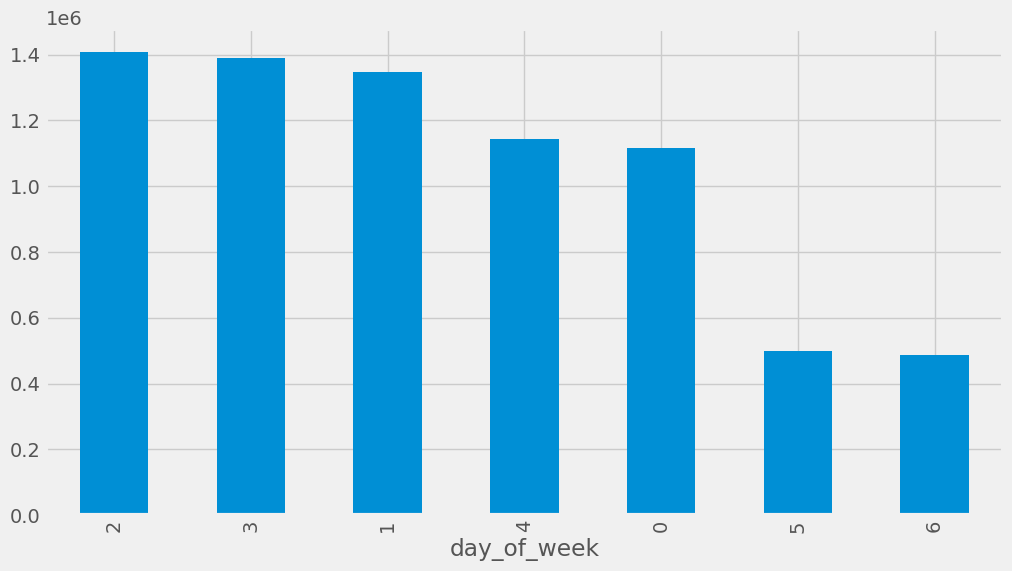

In [232]:
df.groupby('day_of_week')['Occupancy'].sum().sort_values(ascending=False) \
    .plot(kind='bar', figsize=(11, 6))


In [233]:
import pandas as pd

# Ensure the date column is in datetime format (assuming the date column is named 'date')
df['date'] = pd.to_datetime(df['date'])

# Define the date range (assuming the year spans across December to January)
start_date = pd.to_datetime('2023-12-20')
end_date = pd.to_datetime('2024-01-05')

# Filter the data
filtered_df = df.loc[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Display the filtered data
filtered_df


,Occupancy,temp,visibility,dew_point,feels_like,pressure,humidity,wind_speed,clouds_all,rain_1h,...,weather_Snow_sleet,weather_Snow_snow,weather_Thunderstorm_thunderstorm,weather_Thunderstorm_thunderstorm with heavy rain,weather_Thunderstorm_thunderstorm with light rain,weather_Thunderstorm_thunderstorm with rain,term_date,is_holiday,date,day_of_week
date,,,,,,,,,,,,,,,,,,,,,
2023-12-20 00:00:00,17,9.82,10000.0,9.21,8.24,1003,96,3.09,100,0.59,...,False,False,False,False,False,False,False,False,2023-12-20 00:00:00,2
2023-12-20 01:00:00,8,9.54,9656.0,8.93,7.63,1004,96,3.60,100,0.25,...,False,False,False,False,False,False,False,False,2023-12-20 01:00:00,2
2023-12-20 02:00:00,8,9.48,9656.0,9.18,7.31,1005,98,4.12,100,1.53,...,False,False,False,False,False,False,False,False,2023-12-20 02:00:00,2
2023-12-20 03:00:00,11,9.45,4828.0,9.00,7.52,1005,97,3.60,100,0.76,...,False,False,False,False,False,False,False,False,2023-12-20 03:00:00,2
2023-12-20 04:00:00,9,9.48,2414.0,9.18,7.83,1006,98,3.09,100,1.02,...,False,False,False,False,False,False,False,False,2023-12-20 04:00:00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-04 20:00:00,33,6.13,8047.0,5.69,3.18,1017,97,4.12,75,1.02,...,False,False,False,False,False,False,False,False,2024-01-04 20:00:00,3
2024-01-04 21:00:00,33,6.66,10000.0,6.37,4.13,1017,98,3.58,75,0.46,...,False,False,False,False,False,False,False,False,2024-01-04 21:00:00,3
2024-01-04 22:00:00,29,7.30,NaN,6.71,4.67,1018,96,4.02,64,0.29,...,False,False,False,False,False,False,False,False,2024-01-04 22:00:00,3


In [234]:
filtered_df.to_csv("holidays_check.csv")

In [235]:
from statsmodels.tsa.seasonal import STL

In [236]:
import pandas as pd
from statsmodels.tsa.seasonal import STL

# Assuming 'Occupancy' is the column containing the Occupancy data
traffic_series = df['Occupancy']

# Step 1: Ensure the index is a datetime index
df.index = pd.to_datetime(df.index)

# Step 2: Extract 'Occupancy' as a pandas Series
traffic_series = df['Occupancy']



In [237]:

# Step 3: Convert the data type of the Series to numeric (if needed)
traffic_series = pd.to_numeric(traffic_series, errors='coerce')

traffic_series.head()




date
2018-09-06 10:00:00    1016
2018-09-06 11:00:00    1160
2018-09-06 12:00:00    1206
2018-09-06 13:00:00    1168
2018-09-06 14:00:00    1220
Name: Occupancy, dtype: int64

In [238]:
traffic_series.tail()

date
2024-03-05 19:00:00    232
2024-03-05 20:00:00    146
2024-03-05 21:00:00     88
2024-03-05 22:00:00     64
2024-03-05 23:00:00     41
Name: Occupancy, dtype: int64

In [239]:
'''
# Perform STL decomposition
# stl = STL(traffic_series, seasonal= 24 * 7)  # Assuming hourly data with weekly seasonality
result = stl.fit()

print(stl, result, sep='\n')
'''

"\n# Perform STL decomposition\n# stl = STL(traffic_series, seasonal= 24 * 7)  # Assuming hourly data with weekly seasonality\nresult = stl.fit()\n\nprint(stl, result, sep='\n')\n"

In [240]:
'''
# Plot the components
fig, ax = plt.subplots(4, 1, figsize=(12, 8))
plt.subplots_adjust(hspace=3)

# Observed component
result.observed.plot(ax=ax[0], legend=False)
ax[0].set_title('Observed')

# Trend component
result.trend.plot(ax=ax[1], legend=False)
ax[1].set_title('Trend')

# Seasonal component
result.seasonal.plot(ax=ax[2], legend=False)
ax[2].set_title('Seasonal')

# Residual component
result.resid.plot(ax=ax[3], legend=False)
ax[3].set_title('Residual')

# Show plot
plt.show()
'''

"\n# Plot the components\nfig, ax = plt.subplots(4, 1, figsize=(12, 8))\nplt.subplots_adjust(hspace=3)\n\n# Observed component\nresult.observed.plot(ax=ax[0], legend=False)\nax[0].set_title('Observed')\n\n# Trend component\nresult.trend.plot(ax=ax[1], legend=False)\nax[1].set_title('Trend')\n\n# Seasonal component\nresult.seasonal.plot(ax=ax[2], legend=False)\nax[2].set_title('Seasonal')\n\n# Residual component\nresult.resid.plot(ax=ax[3], legend=False)\nax[3].set_title('Residual')\n\n# Show plot\nplt.show()\n"

In [241]:
'''
# Calculate the 25th and 75th quantiles and the IQR
Q1 = traffic_series.quantile(0.25)
Q3 = traffic_series.quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 0.1 * IQR
upper_bound = Q3 + 0.9 * IQR

print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')
'''

"\n# Calculate the 25th and 75th quantiles and the IQR\nQ1 = traffic_series.quantile(0.25)\nQ3 = traffic_series.quantile(0.75)\nIQR = Q3 - Q1\n\n# Calculate the lower and upper bounds\nlower_bound = Q1 - 0.1 * IQR\nupper_bound = Q3 + 0.9 * IQR\n\nprint(f'Lower Bound: {lower_bound}')\nprint(f'Upper Bound: {upper_bound}')\n"

In [242]:
'''
def custom_winsorize(x):
    if x < lower_bound:
        return lower_bound
    elif x > upper_bound:
        return upper_bound
    else:
        return x

cleaned_series = traffic_series.copy()
cleaned_series = cleaned_series.apply(custom_winsorize)
df['Occupancy'] = cleaned_series.copy()
'''

"\ndef custom_winsorize(x):\n    if x < lower_bound:\n        return lower_bound\n    elif x > upper_bound:\n        return upper_bound\n    else:\n        return x\n\ncleaned_series = traffic_series.copy()\ncleaned_series = cleaned_series.apply(custom_winsorize)\ndf['Occupancy'] = cleaned_series.copy()\n"

In [243]:
'''
# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the winsorized time series data
ax.plot(df.index, 'Occupancy', data=df,
       label='Occupancy Rate')

# Plot title and labels
ax.set_title('Winsorized Occupancy')
ax.set_xlabel('Date')
ax.set_ylabel('Occupancy')

# Show legend
plt.legend()

# Show plot
plt.show()
'''

"\n# Create figure and axis\nfig, ax = plt.subplots(figsize=(12, 6))\n\n# Plot the winsorized time series data\nax.plot(df.index, 'Occupancy', data=df,\n       label='Occupancy Rate')\n\n# Plot title and labels\nax.set_title('Winsorized Occupancy')\nax.set_xlabel('Date')\nax.set_ylabel('Occupancy')\n\n# Show legend\nplt.legend()\n\n# Show plot\nplt.show()\n"

In [244]:
def create_features(df, label=None):
    """
    Create time series features from the datetime index
    """
    df = df.copy()
    df['date'] = df.index
    df['month'] = df['date'].dt.month
    df['day_of_year'] = df['date'].dt.dayofyear
    df['day_of_week'] = df['date'].dt.dayofweek
    df['hour'] = df['date'].dt.hour  # Add hour feature
    
    df['year'] = df['date'].dt.year
    df['is_month_start'] = df['date'].dt.is_month_start.astype(int)
    df['is_month_end'] = df['date'].dt.is_month_end.astype(int)
    
    # Seasonality features
    df['sin_day'] = np.sin(2 * np.pi * df['day_of_year'] / 365.25)
    df['cos_day'] = np.cos(2 * np.pi * df['day_of_year'] / 365.25)
    df['sin_week'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['cos_week'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
    df['sin_month'] = np.sin(2 * np.pi * df['month'] / 12)
    df['cos_month'] = np.cos(2 * np.pi * df['month'] / 12)

    # Seasonal indices (if applicable)
    # Autoregressive features (if applicable)
    # Time since last event (if applicable)
    # Day/night indicator
    df['is_day'] = np.where((df['hour'] >= 6) & (df['hour'] <= 18), 1, 0)
    
    # Weekend/weekday indicator
    df['is_weekend'] = df.date.dt.weekday // 4
    
    # Month of year
    df['month_of_year'] = df['date'].dt.month
    
    # Quarter of year
    df['quarter_of_year'] = df['date'].dt.quarter
    
    # Day/night duration
    df['day_duration'] = np.where(df['is_day'] == 1, 12 - df['hour'], 0)
    df['night_duration'] = np.where(df['is_day'] == 0, df['hour'], 0)
    
    # Weather data (if available)
    # Special event indicators (if applicable)
    # Trend features (if applicable)
    
    return df


def create_rolling_calculation_features(df, label=None):
    df = df.copy()
    window_size = 7  # 7-day rolling window

    # Rolling minimum
    df['rolling_min'] = df['Occupancy'].rolling(window=window_size).min()
    
    # Rolling maximum
    df['rolling_max'] = df['Occupancy'].rolling(window=window_size).max()
    
    # Rolling sum
    df['rolling_sum'] = df['Occupancy'].rolling(window=window_size).sum()
    
    # Rollling mean
    df['rolling_mean'] = df['Occupancy'].rolling(window=window_size).mean()
    
    # Rolling median
    df['rolling_median'] = df['Occupancy'].rolling(window=window_size).median()
    
    # Rolling standard deviation
    df['rolling_std'] = df['Occupancy'].rolling(window=window_size).std()
    
    # Rolling 25th percentile
    df['rolling_quantile_25'] = df['Occupancy'].rolling(window=window_size).quantile(0.25)
    
    # Rolling 75th percentile
    df['rolling_quantile_75'] = df['Occupancy'].rolling(window=window_size).quantile(0.75)
    
    return df

# Example usage
df = create_features(df)
#df = create_rolling_calculation_features(df)
df.dtypes


Occupancy            int64
temp               float64
visibility         float64
dew_point          float64
feels_like         float64
                    ...   
is_weekend           int32
month_of_year        int32
quarter_of_year      int32
day_duration         int32
night_duration       int32
Length: 66, dtype: object

In [245]:
df.to_csv("test.csv")

In [246]:
# Replace negative values in 'Occupancy' column with 0
df.loc[df['Occupancy'] < 0, 'Occupancy'] = 0


In [247]:
from sklearn.model_selection import TimeSeriesSplit

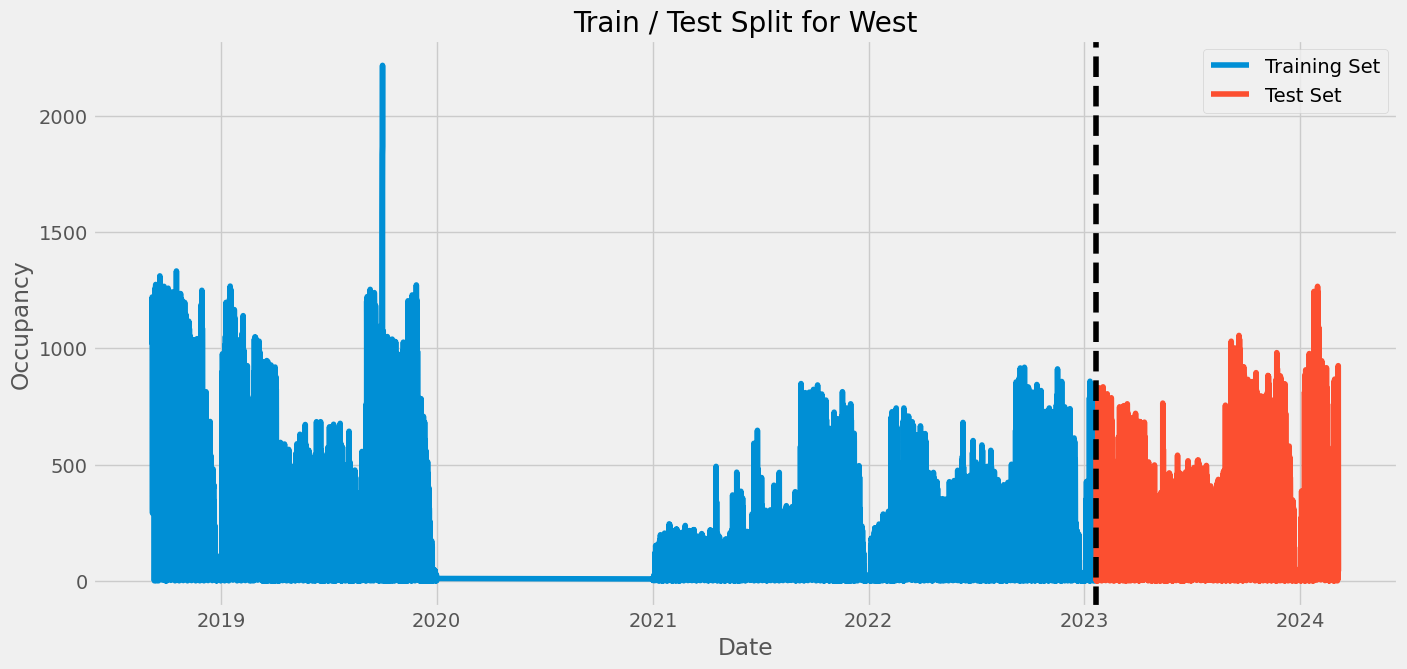

In [248]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
train_size = 0.75
train, test = train_test_split(df, test_size=(1 - train_size), shuffle=False)

# Plotting the data
plt.figure(figsize=(15, 7))
plt.plot(train.index, train['Occupancy'], label='Training Set')
plt.plot(test.index, test['Occupancy'], label='Test Set')
plt.axvline(test.index.min(), color='black', ls='--')
plt.title(f'Train / Test Split for {parking_lot_to_predict}')
plt.xlabel('Date')
plt.ylabel('Occupancy')
plt.legend()
plt.show()


In [249]:
df

,Occupancy,temp,visibility,dew_point,feels_like,pressure,humidity,wind_speed,clouds_all,rain_1h,...,sin_week,cos_week,sin_month,cos_month,is_day,is_weekend,month_of_year,quarter_of_year,day_duration,night_duration
date,,,,,,,,,,,,,,,,,,,,,
2018-09-06 10:00:00,1016,14.59,10000.0,10.21,14.06,1015,75,1.03,20,NaN,...,0.433884,-0.900969,-1.0,-1.836970e-16,1,0,9,3,2,0
2018-09-06 11:00:00,1160,14.01,10000.0,9.85,13.45,1016,76,0.00,40,NaN,...,0.433884,-0.900969,-1.0,-1.836970e-16,1,0,9,3,1,0
2018-09-06 12:00:00,1206,14.16,10000.0,10.58,13.69,1016,79,2.10,75,NaN,...,0.433884,-0.900969,-1.0,-1.836970e-16,1,0,9,3,0,0
2018-09-06 13:00:00,1168,13.85,10000.0,9.70,13.28,1016,76,2.10,30,NaN,...,0.433884,-0.900969,-1.0,-1.836970e-16,1,0,9,3,-1,0
2018-09-06 14:00:00,1220,13.96,10000.0,9.41,13.34,1017,74,2.60,75,NaN,...,0.433884,-0.900969,-1.0,-1.836970e-16,1,0,9,3,-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-05 19:00:00,232,3.21,10000.0,-0.53,1.22,1017,76,2.06,75,NaN,...,0.781831,0.623490,1.0,6.123234e-17,0,0,3,1,0,19
2024-03-05 20:00:00,146,4.18,10000.0,-1.41,0.78,1018,66,4.12,20,NaN,...,0.781831,0.623490,1.0,6.123234e-17,0,0,3,1,0,20
2024-03-05 21:00:00,88,4.17,10000.0,-1.06,0.49,1018,68,4.63,20,NaN,...,0.781831,0.623490,1.0,6.123234e-17,0,0,3,1,0,21


In [250]:
def add_lags(df):
    """
    Create time lags for added time series features and allow the model to learn the temporal structure of the data.
    """
    target_map = df['Occupancy'].to_dict()
    """
    df['lag_1_hour'] = (df.index - pd.Timedelta('1 hours')).map(target_map)
    df['lag_2_hours'] = (df.index - pd.Timedelta('2 hours')).map(target_map)
    df['lag_3_hours'] = (df.index - pd.Timedelta('3 hours')).map(target_map)
    """
    df['lag_7_days'] = (df.index - pd.Timedelta('7 days')).map(target_map)
    df['lag_14_days'] = (df.index - pd.Timedelta('14 days')).map(target_map)
    df['lag_21_days'] = (df.index - pd.Timedelta('21 days')).map(target_map)
    df['lag_28_days'] = (df.index - pd.Timedelta('28 days')).map(target_map)
    df['lag_30_days'] = (df.index - pd.Timedelta('30 days')).map(target_map)
    df['lag_35_days'] = (df.index - pd.Timedelta('35 days')).map(target_map)
    df['lag_42_days'] = (df.index - pd.Timedelta('42 days')).map(target_map)
    df['lag_49_days'] = (df.index - pd.Timedelta('49 days')).map(target_map)
    df['lag_56_days'] = (df.index - pd.Timedelta('56 days')).map(target_map)
    df['lag_60_days'] = (df.index - pd.Timedelta('60 days')).map(target_map)

     # Daily lags
    
    for lag_days in range(1, 7):  # lags for 1 to 6 days
        df[f'lag_{lag_days}_days'] = (df.index - pd.Timedelta(f'{lag_days} days')).map(target_map)
    
    return df

df = add_lags(df)
df

,Occupancy,temp,visibility,dew_point,feels_like,pressure,humidity,wind_speed,clouds_all,rain_1h,...,lag_42_days,lag_49_days,lag_56_days,lag_60_days,lag_1_days,lag_2_days,lag_3_days,lag_4_days,lag_5_days,lag_6_days
date,,,,,,,,,,,,,,,,,,,,,
2018-09-06 10:00:00,1016,14.59,10000.0,10.21,14.06,1015,75,1.03,20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06 11:00:00,1160,14.01,10000.0,9.85,13.45,1016,76,0.00,40,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06 12:00:00,1206,14.16,10000.0,10.58,13.69,1016,79,2.10,75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06 13:00:00,1168,13.85,10000.0,9.70,13.28,1016,76,2.10,30,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06 14:00:00,1220,13.96,10000.0,9.41,13.34,1017,74,2.60,75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-05 19:00:00,232,3.21,10000.0,-0.53,1.22,1017,76,2.06,75,NaN,...,116.0,179.0,165.0,36.0,211.0,17.0,62.0,121.0,222.0,246.0
2024-03-05 20:00:00,146,4.18,10000.0,-1.41,0.78,1018,66,4.12,20,NaN,...,60.0,81.0,74.0,34.0,138.0,18.0,47.0,101.0,146.0,168.0
2024-03-05 21:00:00,88,4.17,10000.0,-1.06,0.49,1018,68,4.63,20,NaN,...,29.0,29.0,39.0,48.0,91.0,17.0,40.0,78.0,77.0,113.0


In [251]:
# Define error metrics

# Root mean squared error (RMSE)
def root_mean_squared_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sqrt(np.mean((y_true - y_pred)**2))

# Mean absolute percentage error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    # Replace zero values in y_true with a small constant to avoid division by zero
    epsilon = 1e-10
    y_true_nonzero = np.where(y_true == 0, epsilon, y_true)
    
    # Calculate MAPE
    return np.mean(np.abs((y_true_nonzero - y_pred) / y_true_nonzero)) * 100

# Symmetric mean absolute percentage error (sMAPE)
def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100

# Mean Absolute Error (MAE)
def mean_absolute_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred))

# Mean Squared Error (MSE)
def mean_squared_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((y_true - y_pred)**2)

In [252]:
df.columns

Index(['Occupancy', 'temp', 'visibility', 'dew_point', 'feels_like',
       'pressure', 'humidity', 'wind_speed', 'clouds_all', 'rain_1h',
       'snow_1h', 'weather_Clear_sky is clear', 'weather_Clouds_broken clouds',
       'weather_Clouds_few clouds', 'weather_Clouds_overcast clouds',
       'weather_Clouds_scattered clouds', 'weather_Drizzle_drizzle',
       'weather_Drizzle_light intensity drizzle',
       'weather_Drizzle_light intensity drizzle rain',
       'weather_Drizzle_rain and drizzle', 'weather_Dust_dust',
       'weather_Fog_fog', 'weather_Haze_haze', 'weather_Mist_mist',
       'weather_Rain_heavy intensity rain',
       'weather_Rain_heavy intensity shower rain',
       'weather_Rain_light intensity shower rain', 'weather_Rain_light rain',
       'weather_Rain_moderate rain', 'weather_Rain_proximity shower rain',
       'weather_Rain_shower rain', 'weather_Rain_very heavy rain',
       'weather_Smoke_smoke', 'weather_Snow_heavy snow',
       'weather_Snow_light rain a

In [253]:
df.dtypes

Occupancy       int64
temp          float64
visibility    float64
dew_point     float64
feels_like    float64
               ...   
lag_2_days    float64
lag_3_days    float64
lag_4_days    float64
lag_5_days    float64
lag_6_days    float64
Length: 82, dtype: object

In [254]:
df

,Occupancy,temp,visibility,dew_point,feels_like,pressure,humidity,wind_speed,clouds_all,rain_1h,...,lag_42_days,lag_49_days,lag_56_days,lag_60_days,lag_1_days,lag_2_days,lag_3_days,lag_4_days,lag_5_days,lag_6_days
date,,,,,,,,,,,,,,,,,,,,,
2018-09-06 10:00:00,1016,14.59,10000.0,10.21,14.06,1015,75,1.03,20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06 11:00:00,1160,14.01,10000.0,9.85,13.45,1016,76,0.00,40,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06 12:00:00,1206,14.16,10000.0,10.58,13.69,1016,79,2.10,75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06 13:00:00,1168,13.85,10000.0,9.70,13.28,1016,76,2.10,30,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06 14:00:00,1220,13.96,10000.0,9.41,13.34,1017,74,2.60,75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-05 19:00:00,232,3.21,10000.0,-0.53,1.22,1017,76,2.06,75,NaN,...,116.0,179.0,165.0,36.0,211.0,17.0,62.0,121.0,222.0,246.0
2024-03-05 20:00:00,146,4.18,10000.0,-1.41,0.78,1018,66,4.12,20,NaN,...,60.0,81.0,74.0,34.0,138.0,18.0,47.0,101.0,146.0,168.0
2024-03-05 21:00:00,88,4.17,10000.0,-1.06,0.49,1018,68,4.63,20,NaN,...,29.0,29.0,39.0,48.0,91.0,17.0,40.0,78.0,77.0,113.0


In [255]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming df is your DataFrame and create_features is a function to generate features
train, test = train_test_split(df, test_size=(1-train_size), shuffle=False)

train = create_features(train)
test = create_features(test)

# Make empty lists for the error metric scores
rmse_scores = []
mape_scores = []
smape_scores = []
mae_scores = []
mse_scores = []

# Define the target variable and the column to exclude
TARGET = 'Occupancy'
EXCLUDE_COLUMNS = ['date', TARGET]

# Generate the list of features
FEATURES = [col for col in df.columns if col not in EXCLUDE_COLUMNS]
# weather features
# FEATURES = ['temp', 'visibility', 'dew_point', 'feels_like', 'pressure', 'humidity', 'wind_speed', 'clouds_all', 'rain_1h', 'snow_1h', 'weather_Clear_sky is clear', 'weather_Clouds_broken clouds', 'weather_Clouds_few clouds', 'weather_Clouds_overcast clouds', 'weather_Clouds_scattered clouds', 'weather_Drizzle_drizzle', 'weather_Drizzle_light intensity drizzle', 'weather_Drizzle_light intensity drizzle rain', 'weather_Drizzle_rain and drizzle', 'weather_Dust_dust', 'weather_Fog_fog', 'weather_Haze_haze', 'weather_Mist_mist', 'weather_Rain_heavy intensity rain', 'weather_Rain_heavy intensity shower rain', 'weather_Rain_light intensity shower rain', 'weather_Rain_light rain', 'weather_Rain_moderate rain', 'weather_Rain_proximity shower rain', 'weather_Rain_shower rain', 'weather_Rain_very heavy rain', 'weather_Smoke_smoke', 'weather_Snow_heavy snow', 'weather_Snow_light rain and snow', 'weather_Snow_light shower sleet', 'weather_Snow_light shower snow', 'weather_Snow_light snow', 'weather_Snow_sleet', 'weather_Snow_snow', 'weather_Thunderstorm_thunderstorm', 'weather_Thunderstorm_thunderstorm with heavy rain', 'weather_Thunderstorm_thunderstorm with light rain', 'weather_Thunderstorm_thunderstorm with rain']


print(FEATURES)


['temp', 'visibility', 'dew_point', 'feels_like', 'pressure', 'humidity', 'wind_speed', 'clouds_all', 'rain_1h', 'snow_1h', 'weather_Clear_sky is clear', 'weather_Clouds_broken clouds', 'weather_Clouds_few clouds', 'weather_Clouds_overcast clouds', 'weather_Clouds_scattered clouds', 'weather_Drizzle_drizzle', 'weather_Drizzle_light intensity drizzle', 'weather_Drizzle_light intensity drizzle rain', 'weather_Drizzle_rain and drizzle', 'weather_Dust_dust', 'weather_Fog_fog', 'weather_Haze_haze', 'weather_Mist_mist', 'weather_Rain_heavy intensity rain', 'weather_Rain_heavy intensity shower rain', 'weather_Rain_light intensity shower rain', 'weather_Rain_light rain', 'weather_Rain_moderate rain', 'weather_Rain_proximity shower rain', 'weather_Rain_shower rain', 'weather_Rain_very heavy rain', 'weather_Smoke_smoke', 'weather_Snow_heavy snow', 'weather_Snow_light rain and snow', 'weather_Snow_light shower sleet', 'weather_Snow_light shower snow', 'weather_Snow_light snow', 'weather_Snow_slee

In [256]:
train.to_csv('train.csv')

In [257]:

'''
FEATURES = ['hour','day_of_week', 'month', 'day_of_year', 'rolling_min', 'rolling_max',
            'rolling_sum', 'rolling_mean', 'rolling_median', 'rolling_std', 'rolling_quantile_25',
            'rolling_quantile_75', 'lag_7_days', 'lag_14_days', 'lag_21_days', 'lag_28_days', 
            'lag_30_days', 'lag_35_days', 'lag_42_days', 'lag_49_days', 'lag_56_days', 'lag_60_days',
            'lag_1_hour', 'lag_2_hours', 'lag_3_hours',
            'lag_1_days', 'lag_2_days', 'lag_3_days', 'lag_4_days', 'lag_5_days','lag_6_days',
            ] + WEATHER_FEATURES

'''

TARGET = 'Occupancy'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

reg = lgb.LGBMRegressor(boosting_type='gbdt',
                        n_estimators=5000,
                        early_stopping_rounds=150,
                        objective='regression',
                        max_depth=5,
                        min_child_samples=1,
                        learning_rate=0.05,
                        colsample_bytree=0.91,
                        subsample=0.5,
                        reg_lambda=0.2)

reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

y_pred = reg.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calculate additional metrics if needed
mape = mean_absolute_percentage_error(y_test, y_pred)
smape = symmetric_mean_absolute_percentage_error(y_test, y_pred)

# Store the scores
rmse_scores.append(rmse)
mape_scores.append(mape)
smape_scores.append(smape)
mae_scores.append(mae)
mse_scores.append(mse)

# Store actual and predicted values along with their datetime index in the DataFrame
actual_vs_pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=test.index)


[LightGBM] [Warning] early_stopping_round is set=150, early_stopping_rounds=150 will be ignored. Current value: early_stopping_round=150
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003749 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6483
[LightGBM] [Info] Number of data points in the train set: 29548, number of used features: 71
[LightGBM] [Warning] early_stopping_round is set=150, early_stopping_rounds=150 will be ignored. Current value: early_stopping_round=150
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_dept

In [258]:
# Print the error metric results
print(f'RMSE across folds: {np.mean(rmse_scores):.16f}')
#print(f'MAPE across folds: {np.mean(mape_scores):.3f}%')
#print(f'sMAPE across folds: {np.mean(smape_scores):.3f}%')
print(f'MAE across folds: {np.mean(mae_scores):.16f}')
print(f'MSE across folds: {np.mean(mse_scores):.16f}')

RMSE across folds: 74.5758575952368403
MAE across folds: 39.3734734122597985
MSE across folds: 5561.5585360650438815


In [259]:
actual_vs_pred_df.to_csv(f'lgb_{parking_lot_to_predict}_actual_vs_predicted.csv', index=True)

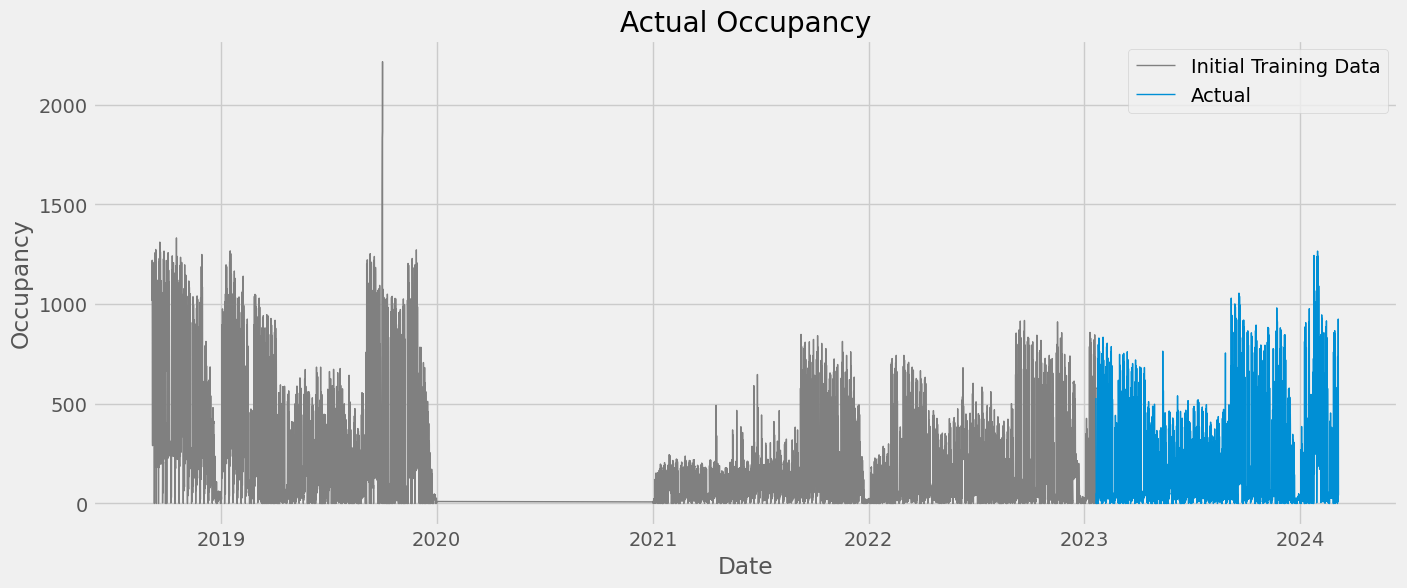

In [260]:
# Create figure
plt.figure(figsize=(15, 6))

# Plot the initial training data
plt.plot(train.index, train['Occupancy'], label='Initial Training Data', color='gray', linewidth=1)

# Plot for the actual and predicted values
plt.plot(actual_vs_pred_df.index, actual_vs_pred_df['Actual'], label='Actual', linewidth=1)

# Plot labels and title
plt.xlabel('Date')
plt.ylabel('Occupancy')
plt.title('Actual Occupancy')

# Show legend
plt.legend()

# Show plot
plt.show()


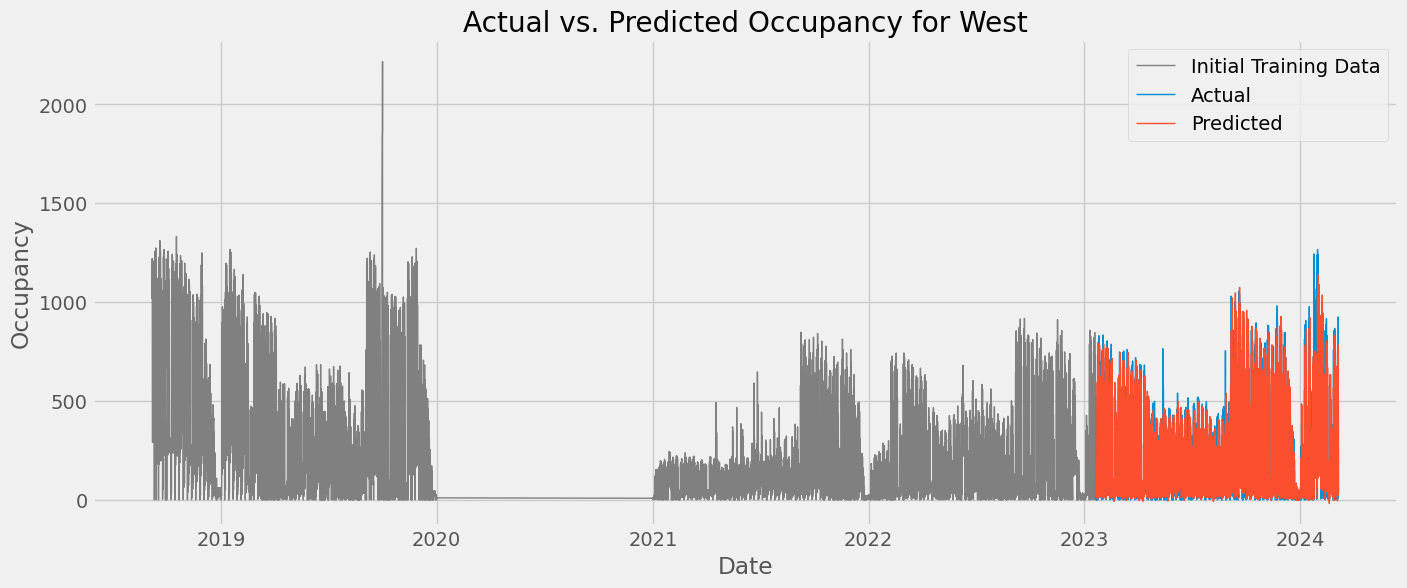

In [261]:
# Create figure
plt.figure(figsize=(15, 6))

# Plot the initial training data
plt.plot(train.index, train['Occupancy'], label='Initial Training Data', color='gray', linewidth=1)

# Plot for the actual and predicted values
plt.plot(actual_vs_pred_df.index, actual_vs_pred_df['Actual'], label='Actual', linewidth=1)
plt.plot(actual_vs_pred_df.index, actual_vs_pred_df['Predicted'], label='Predicted', linewidth=1)

# Plot labels and title
plt.xlabel('Date')
plt.ylabel('Occupancy')
plt.title(f'Actual vs. Predicted Occupancy for {parking_lot_to_predict}')

# Show legend
plt.legend()

# Show plot
plt.show()


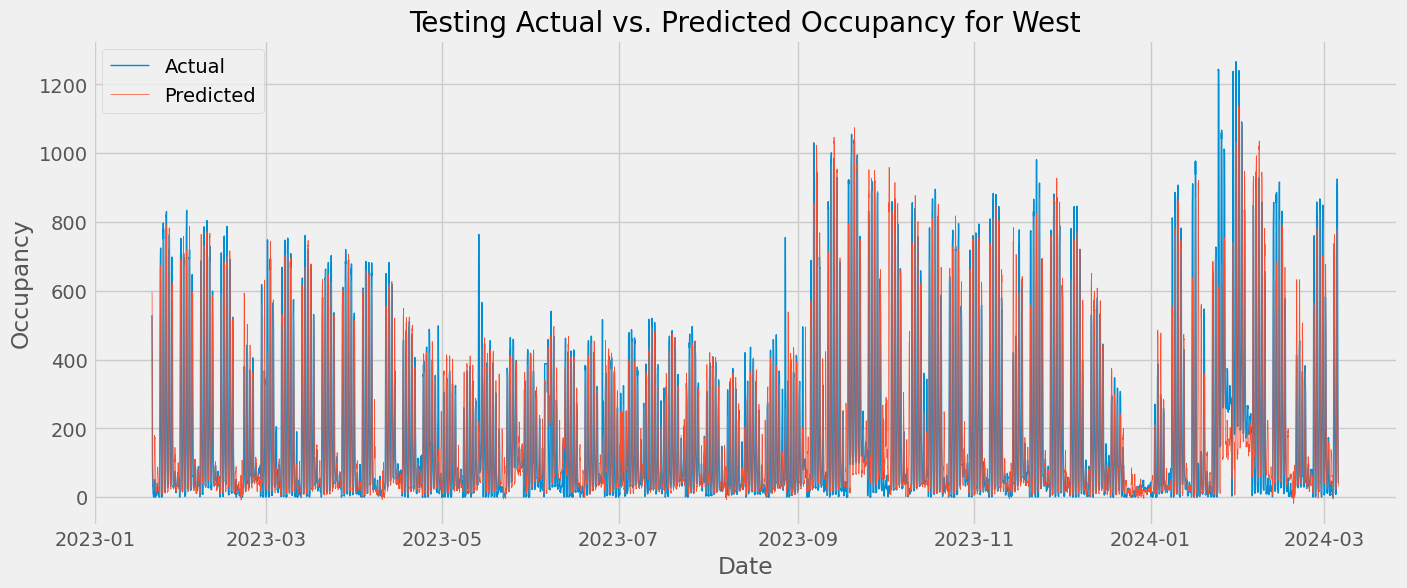

In [262]:
# Filter actual_vs_pred_df to include only the testing period
testing_actual_vs_pred_df = actual_vs_pred_df.loc[y_test.index]

# Create figure
plt.figure(figsize=(15, 6))

# Plot for the actual and predicted values during the testing period
plt.plot(testing_actual_vs_pred_df.index, testing_actual_vs_pred_df['Actual'], label='Actual', linewidth=1)
plt.plot(testing_actual_vs_pred_df.index, testing_actual_vs_pred_df['Predicted'], label='Predicted', linewidth=0.5)

# Plot labels and title
plt.xlabel('Date')
plt.ylabel('Occupancy')
plt.title(f'Testing Actual vs. Predicted Occupancy for {parking_lot_to_predict}')

# Show legend
plt.legend()

# Show plot
plt.show()


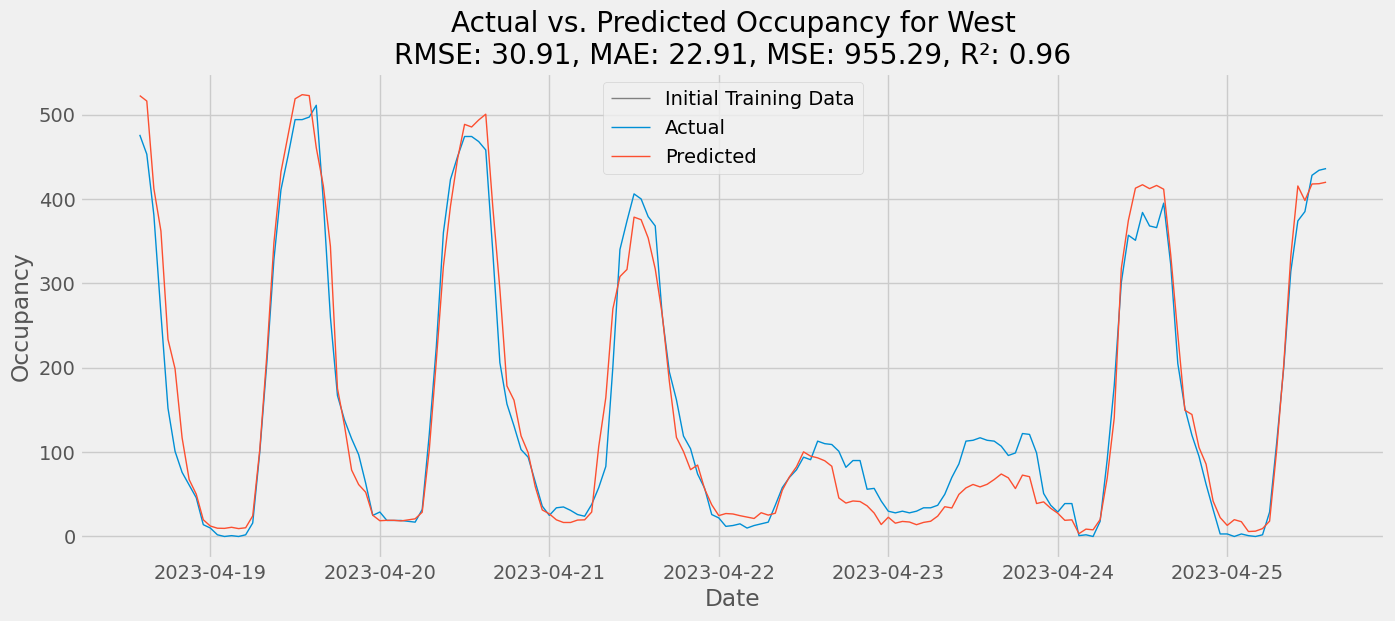

In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ensure y_test has a DateTimeIndex
start_date = y_test.index.min()
end_date = y_test.index.max()

# Select a random start date within the y_test date range, ensuring there's room for 2 days after it
random_start_date = start_date + pd.to_timedelta(np.random.randint(0, (end_date - start_date).days - 1), unit='D')
random_end_date = random_start_date + pd.Timedelta(days=7)

# Filter the dataframes based on the 2-day range
train_filtered = train.loc[(train.index >= random_start_date) & (train.index <= random_end_date)]
actual_vs_pred_filtered = actual_vs_pred_df.loc[(actual_vs_pred_df.index >= random_start_date) & (actual_vs_pred_df.index <= random_end_date)]

# Ensure alignment of actual and predicted values
actual_vs_pred_filtered = actual_vs_pred_filtered.dropna(subset=['Actual', 'Predicted'])

# Calculate errors
actual = actual_vs_pred_filtered['Actual']
predicted = actual_vs_pred_filtered['Predicted']

mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual, predicted)
r2 = r2_score(actual, predicted)

# Create figure
plt.figure(figsize=(15, 6))

# Plot the initial training data
plt.plot(train_filtered.index, train_filtered['Occupancy'], label='Initial Training Data', color='gray', linewidth=1)

# Plot for the actual and predicted values
plt.plot(actual_vs_pred_filtered.index, actual_vs_pred_filtered['Actual'], label='Actual', linewidth=1)
plt.plot(actual_vs_pred_filtered.index, actual_vs_pred_filtered['Predicted'], label='Predicted', linewidth=1)

# Plot labels and title
plt.xlabel('Date')
plt.ylabel('Occupancy')
plt.title(f'Actual vs. Predicted Occupancy for {parking_lot_to_predict}\n'
          f'RMSE: {rmse:.2f}, MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}')

# Show legend
plt.legend()

# Show plot
plt.show()


In [264]:
actual_vs_pred_df.to_csv('west_actualvspred_longpred.csv')

In [265]:
actual_vs_pred_df

,Actual,Predicted
date,,
2023-01-20 14:00:00,529,597.563634
2023-01-20 15:00:00,461,585.311543
2023-01-20 16:00:00,324,391.920658
2023-01-20 17:00:00,182,305.950944
2023-01-20 18:00:00,100,190.306768
...,...,...
2024-03-05 19:00:00,232,260.632872
2024-03-05 20:00:00,146,217.654136
2024-03-05 21:00:00,88,120.908895


In [266]:
# Record the end time
end_time = time.time()

# Calculate the total run time
total_run_time = end_time - start_time
print("Total run time:", total_run_time, "seconds")

Total run time: 5.805613994598389 seconds


In [267]:
"""
# Retrain on all the data
df = create_features(df)

TARGET = 'Occupancy'

X_all = df[FEATURES]
y_all = df[TARGET]

reg = lgb.LGBMRegressor(boosting_type='gbdt',
                        n_estimators=5000,
                        early_stopping_rounds=150,
                        objective='regression',
                        max_depth=5,
                        min_child_samples=1,
                        learning_rate=0.05,
                        colsample_bytree=0.91,
                        subsample=0.5,
                        reg_lambda=0.2)

reg.fit(X_all, y_all, eval_set=[(X_all, y_all)])
"""

"\n# Retrain on all the data\ndf = create_features(df)\n\nTARGET = 'Occupancy'\n\nX_all = df[FEATURES]\ny_all = df[TARGET]\n\nreg = lgb.LGBMRegressor(boosting_type='gbdt',\n                        n_estimators=5000,\n                        early_stopping_rounds=150,\n                        objective='regression',\n                        max_depth=5,\n                        min_child_samples=1,\n                        learning_rate=0.05,\n                        colsample_bytree=0.91,\n                        subsample=0.5,\n                        reg_lambda=0.2)\n\nreg.fit(X_all, y_all, eval_set=[(X_all, y_all)])\n"

In [268]:
first_date_time = df.iloc[0]['date']
last_date_time = df.iloc[-1]['date']
#print(last_date_time)

new_date_time = last_date_time + pd.DateOffset(months=3)
#print(new_date_time)

first_date_time_str = first_date_time.strftime('%Y-%m-%d %H:%M:%S')
last_date_time_str = last_date_time.strftime('%Y-%m-%d %H:%M:%S')
new_date_time_str = new_date_time.strftime('%Y-%m-%d %H:%M:%S')
print(first_date_time_str)
print(last_date_time_str)
#print(new_date_time_str)

2018-09-06 10:00:00
2024-03-05 23:00:00


In [269]:
import pandas as pd

def update_features_for_date(df, date):
    """
    Create time series features for a specific date from the datetime index.
    """
    df['date'] = df.index
    
    # Create a dictionary to hold the new feature values for the specific date
    new_features = {}
    new_features['month'] = date.month
    new_features['day_of_year'] = date.dayofyear
    new_features['day_of_week'] = date.dayofweek
    new_features['hour'] = date.hour  # Add hour feature

    df['year'] = df['date'].dt.year
    df['is_month_start'] = df['date'].dt.is_month_start.astype(int)
    df['is_month_end'] = df['date'].dt.is_month_end.astype(int)
    
    # Seasonality features
    df['sin_day'] = np.sin(2 * np.pi * df['day_of_year'] / 365.25)
    df['cos_day'] = np.cos(2 * np.pi * df['day_of_year'] / 365.25)
    df['sin_week'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['cos_week'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
    df['sin_month'] = np.sin(2 * np.pi * df['month'] / 12)
    df['cos_month'] = np.cos(2 * np.pi * df['month'] / 12)

    # Seasonal indices (if applicable)
    # Autoregressive features (if applicable)
    # Time since last event (if applicable)
    # Day/night indicator
    df['is_day'] = np.where((df['hour'] >= 6) & (df['hour'] <= 18), 1, 0)
    
    # Weekend/weekday indicator
    df['is_weekend'] = df.date.dt.weekday // 4
    
    # Month of year
    df['month_of_year'] = df['date'].dt.month
    
    # Quarter of year
    df['quarter_of_year'] = df['date'].dt.quarter
    
    # Day/night duration
    df['day_duration'] = np.where(df['is_day'] == 1, 12 - df['hour'], 0)
    df['night_duration'] = np.where(df['is_day'] == 0, df['hour'], 0)

def update_rolling_features_for_date(df, date):
    df['date'] = df.index
    
    # Calculate the rolling window size and ensure we have enough data points
    window_size = 7  # 7-day rolling window
    past_window = df.loc[:date].tail(window_size)
    
    if len(past_window) < window_size:
        raise ValueError("Not enough data points in the past window to calculate rolling features.")
    
    new_features = {}
    # Rolling features based on past window
    new_features['rolling_min'] = float(past_window['Occupancy'].min())
    new_features['rolling_max'] = float(past_window['Occupancy'].max())
    new_features['rolling_sum'] = float(past_window['Occupancy'].sum())
    new_features['rolling_mean'] = float(past_window['Occupancy'].mean())
    new_features['rolling_median'] = float(past_window['Occupancy'].median())
    new_features['rolling_std'] = float(past_window['Occupancy'].std())
    new_features['rolling_quantile_25'] = float(past_window['Occupancy'].quantile(0.25))
    new_features['rolling_quantile_75'] = float(past_window['Occupancy'].quantile(0.75))
    
    # Update the DataFrame at the specific date index
    for feature, value in new_features.items():
        df.loc[date, feature] = value

In [270]:
def update_lags_for_date(df, date):
    """
    Create time lags for added time series features for a given date and allow the model to learn the temporal structure of the data.
    """
    target_map = df['Occupancy'].to_dict()

    # Create a dictionary to hold the lag features for the specific date
    lag_features = {}
    """
    lag_features['lag_1_hour'] = float(target_map.get(date - pd.Timedelta('1 hours'), None))
    lag_features['lag_2_hours'] = float(target_map.get(date - pd.Timedelta('2 hours'), None))
    lag_features['lag_3_hours'] = float(target_map.get(date - pd.Timedelta('3 hours'), None))
    """

    lag_features['lag_7_days'] = float(target_map.get(date - pd.Timedelta('7 days'), None))
    lag_features['lag_14_days'] = float(target_map.get(date - pd.Timedelta('14 days'), None))
    lag_features['lag_21_days'] = float(target_map.get(date - pd.Timedelta('21 days'), None))
    lag_features['lag_28_days'] = float(target_map.get(date - pd.Timedelta('28 days'), None))
    lag_features['lag_30_days'] = float(target_map.get(date - pd.Timedelta('30 days'), None))
    lag_features['lag_35_days'] = float(target_map.get(date - pd.Timedelta('35 days'), None))
    lag_features['lag_42_days'] = float(target_map.get(date - pd.Timedelta('42 days'), None))
    lag_features['lag_49_days'] = float(target_map.get(date - pd.Timedelta('49 days'), None))
    lag_features['lag_56_days'] = float(target_map.get(date - pd.Timedelta('56 days'), None))
    lag_features['lag_60_days'] = float(target_map.get(date - pd.Timedelta('60 days'), None))

    
    # Daily lags
    for lag_days in range(1, 7):  # lags for 1 to 6 days
        lag_features[f'lag_{lag_days}_days'] = float(target_map.get(date - pd.Timedelta(f'{lag_days} days'), None))
        
    
    # Update the DataFrame at the specific date index
    for feature, value in lag_features.items():
        df.loc[date, feature] = value

# Example usage:
# date_time = pd.Timestamp('2023-12-14 22:00:00')  # Replace with your specific datetime
# updated_df = update_lags_for_date(something_df, date_time)

In [271]:
train_size = 0.75
new_train, new_test = train_test_split(df, test_size=(1 - train_size), shuffle=False)
old_test= new_test.copy()

# Define rolling calculation columns and time lag data columns to be cleaned
rolling_calculation_columns = [col for col in new_test.columns if 'rolling' in col]  # Example: Identify rolling calculation columns
time_lag_columns = [col for col in new_test.columns if 'lag' in col]  # Example: Identify time lag data columns
occupancy_column = [col for col in new_test.columns if 'Occupancy' in col]  # Example: Identify occupancy data columns

# Iterate over rolling calculation columns and set data to NaN
for col in rolling_calculation_columns:
    new_test[col] = np.nan

# Iterate over time lag data columns and set data to NaN
for col in time_lag_columns:
    new_test[col] = np.nan

# Iterate over occupancy columns and set data to NaN
for occ in occupancy_column:
    new_test[occ] = np.nan

something_df = pd.concat([new_train, new_test])

In [272]:
start_ind_time = new_train.iloc[-1]['date']
end_ind_time = new_test.iloc[-1]['date']

print(start_ind_time, end_ind_time)

2023-01-20 13:00:00 2024-03-05 23:00:00


In [273]:
# Select data between rand_date_time and last_date_time
selected_data = something_df.loc[(something_df.index > start_ind_time) & (something_df.index <= end_ind_time)]
selected_data

,Occupancy,temp,visibility,dew_point,feels_like,pressure,humidity,wind_speed,clouds_all,rain_1h,...,lag_42_days,lag_49_days,lag_56_days,lag_60_days,lag_1_days,lag_2_days,lag_3_days,lag_4_days,lag_5_days,lag_6_days
date,,,,,,,,,,,,,,,,,,,,,
2023-01-20 14:00:00,NaN,4.06,10000.0,3.63,0.63,1033,97,4.12,100,0.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-20 15:00:00,NaN,4.07,3200.0,3.64,0.65,1033,97,4.12,100,0.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-20 16:00:00,NaN,3.90,4828.0,3.32,0.44,1033,96,4.12,100,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-20 17:00:00,NaN,4.26,8047.0,3.68,0.88,1034,96,4.12,100,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-20 18:00:00,NaN,4.83,9000.0,3.80,1.31,1034,93,4.63,75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-05 19:00:00,NaN,3.21,10000.0,-0.53,1.22,1017,76,2.06,75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-05 20:00:00,NaN,4.18,10000.0,-1.41,0.78,1018,66,4.12,20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-05 21:00:00,NaN,4.17,10000.0,-1.06,0.49,1018,68,4.63,20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [274]:
date_time = selected_data.iloc[0]["date"]
print(date_time)

2023-01-20 14:00:00


In [275]:
update_features_for_date(something_df, date_time)
#update_rolling_features_for_date(something_df, date_time)
update_lags_for_date(something_df, date_time)

    # Assuming 'row_data' contains the data for the single row you want to predict
    # 'row_data' should be a pandas Series or DataFrame with the same columns as your training data
row_data = something_df[something_df.index == date_time].iloc[0]  # Example: selecting the first row from the test data
    # List of features to exclude
features_to_exclude = ["Occupancy", "date"]  # Add the names of features you want to exclude

    # Filtering out excluded features
filtered_row_data = row_data.drop(features_to_exclude, inplace=False)  # inplace=False ensures row_data remains unchanged

    # Extracting the features from the filtered row data
X_single = filtered_row_data[FEATURES].values.reshape(1, -1)  # Reshaping to a 2D array as expected by the model

filtered_row_data = pd.DataFrame([filtered_row_data])
predicted_occupancy = reg.predict(filtered_row_data)
    # Extract the predicted occupancy value from the array
predicted_occupancy_value = predicted_occupancy[0]

print(predicted_occupancy_value)

    # Assign predicted occupancy to the 'Occupancy' column of the row with index 'last_date_time'
something_df.loc[date_time, 'Occupancy'] = predicted_occupancy_value
row_data = something_df[something_df.index == date_time].iloc[0]
print(row_data)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
597.5636338335842
Occupancy     597.563634
temp                4.06
visibility       10000.0
dew_point           3.63
feels_like          0.63
                 ...    
lag_2_days         837.0
lag_3_days         822.0
lag_4_days         749.0
lag_5_days          23.0
lag_6_days         125.0
Name: 2023-01-20 14:00:00, Length: 82, dtype: object


In [276]:
row_at_specified_date = actual_vs_pred_df.loc[date_time]
row_at_specified_date

Actual       529.000000
Predicted    597.563634
Name: 2023-01-20 14:00:00, dtype: float64

In [277]:
something_df
# Select data between rand_date_time and last_date_time
selected_data = something_df.loc[(something_df.index > start_ind_time) & (something_df.index <= end_ind_time)]
selected_data

,Occupancy,temp,visibility,dew_point,feels_like,pressure,humidity,wind_speed,clouds_all,rain_1h,...,lag_42_days,lag_49_days,lag_56_days,lag_60_days,lag_1_days,lag_2_days,lag_3_days,lag_4_days,lag_5_days,lag_6_days
date,,,,,,,,,,,,,,,,,,,,,
2023-01-20 14:00:00,597.563634,4.06,10000.0,3.63,0.63,1033,97,4.12,100,0.23,...,357.0,428.0,613.0,830.0,733.0,837.0,822.0,749.0,23.0,125.0
2023-01-20 15:00:00,NaN,4.07,3200.0,3.64,0.65,1033,97,4.12,100,0.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-20 16:00:00,NaN,3.90,4828.0,3.32,0.44,1033,96,4.12,100,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-20 17:00:00,NaN,4.26,8047.0,3.68,0.88,1034,96,4.12,100,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-20 18:00:00,NaN,4.83,9000.0,3.80,1.31,1034,93,4.63,75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-05 19:00:00,NaN,3.21,10000.0,-0.53,1.22,1017,76,2.06,75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-05 20:00:00,NaN,4.18,10000.0,-1.41,0.78,1018,66,4.12,20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-05 21:00:00,NaN,4.17,10000.0,-1.06,0.49,1018,68,4.63,20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [278]:
old_test

,Occupancy,temp,visibility,dew_point,feels_like,pressure,humidity,wind_speed,clouds_all,rain_1h,...,lag_42_days,lag_49_days,lag_56_days,lag_60_days,lag_1_days,lag_2_days,lag_3_days,lag_4_days,lag_5_days,lag_6_days
date,,,,,,,,,,,,,,,,,,,,,
2023-01-20 14:00:00,529,4.06,10000.0,3.63,0.63,1033,97,4.12,100,0.23,...,357.0,428.0,613.0,830.0,733.0,837.0,822.0,749.0,23.0,125.0
2023-01-20 15:00:00,461,4.07,3200.0,3.64,0.65,1033,97,4.12,100,0.10,...,342.0,392.0,528.0,774.0,721.0,778.0,768.0,720.0,14.0,123.0
2023-01-20 16:00:00,324,3.90,4828.0,3.32,0.44,1033,96,4.12,100,NaN,...,244.0,287.0,373.0,620.0,551.0,632.0,618.0,579.0,19.0,138.0
2023-01-20 17:00:00,182,4.26,8047.0,3.68,0.88,1034,96,4.12,100,NaN,...,132.0,173.0,234.0,455.0,413.0,467.0,470.0,420.0,10.0,103.0
2023-01-20 18:00:00,100,4.83,9000.0,3.80,1.31,1034,93,4.63,75,NaN,...,96.0,104.0,139.0,304.0,233.0,332.0,310.0,292.0,7.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-05 19:00:00,232,3.21,10000.0,-0.53,1.22,1017,76,2.06,75,NaN,...,116.0,179.0,165.0,36.0,211.0,17.0,62.0,121.0,222.0,246.0
2024-03-05 20:00:00,146,4.18,10000.0,-1.41,0.78,1018,66,4.12,20,NaN,...,60.0,81.0,74.0,34.0,138.0,18.0,47.0,101.0,146.0,168.0
2024-03-05 21:00:00,88,4.17,10000.0,-1.06,0.49,1018,68,4.63,20,NaN,...,29.0,29.0,39.0,48.0,91.0,17.0,40.0,78.0,77.0,113.0


In [279]:
# Create a date range from last_date_time to new_date_time
date_range = pd.date_range(start=start_ind_time, end=end_ind_time, freq='H')  # 'D' represents day frequency
for date_time in date_range:
    
    update_features_for_date(something_df, date_time)
    #update_rolling_features_for_date(something_df, date_time)
    update_lags_for_date(something_df, date_time)

        # Assuming 'row_data' contains the data for the single row you want to predict
        # 'row_data' should be a pandas Series or DataFrame with the same columns as your training data
    row_data = something_df[something_df.index == date_time].iloc[0]  # Example: selecting the first row from the test data
        # List of features to exclude
    features_to_exclude = ["Occupancy", "date"]  # Add the names of features you want to exclude

        # Filtering out excluded features
    filtered_row_data = row_data.drop(features_to_exclude, inplace=False)  # inplace=False ensures row_data remains unchanged

        # Extracting the features from the filtered row data
    X_single = filtered_row_data[FEATURES].values.reshape(1, -1)  # Reshaping to a 2D array as expected by the model

    filtered_row_data = pd.DataFrame([filtered_row_data])
    predicted_occupancy = reg.predict(filtered_row_data)
        # Extract the predicted occupancy value from the array
    predicted_occupancy_value = predicted_occupancy[0]

    print(predicted_occupancy_value)

        # Assign predicted occupancy to the 'Occupancy' column of the row with index 'last_date_time'
    something_df.loc[date_time, 'Occupancy'] = predicted_occupancy_value
    row_data = something_df[something_df.index == date_time].iloc[0]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
566.9574520555585
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
597.5636338335842
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
585.3115426154795
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
391.9206579909508
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
305.9509444138171
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
190.3067679927834
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves.

KeyboardInterrupt: 

In [280]:
something_df
# Select data between rand_date_time and last_date_time
selected_data = something_df.loc[(something_df.index > start_ind_time) & (something_df.index <= end_ind_time)]
selected_data

,Occupancy,temp,visibility,dew_point,feels_like,pressure,humidity,wind_speed,clouds_all,rain_1h,...,lag_42_days,lag_49_days,lag_56_days,lag_60_days,lag_1_days,lag_2_days,lag_3_days,lag_4_days,lag_5_days,lag_6_days
date,,,,,,,,,,,,,,,,,,,,,
2023-01-20 14:00:00,597.563634,4.06,10000.0,3.63,0.63,1033,97,4.12,100,0.23,...,357.0,428.0,613.0,830.0,733.0,837.0,822.0,749.0,23.0,125.0
2023-01-20 15:00:00,585.311543,4.07,3200.0,3.64,0.65,1033,97,4.12,100,0.10,...,342.0,392.0,528.0,774.0,721.0,778.0,768.0,720.0,14.0,123.0
2023-01-20 16:00:00,391.920658,3.90,4828.0,3.32,0.44,1033,96,4.12,100,NaN,...,244.0,287.0,373.0,620.0,551.0,632.0,618.0,579.0,19.0,138.0
2023-01-20 17:00:00,305.950944,4.26,8047.0,3.68,0.88,1034,96,4.12,100,NaN,...,132.0,173.0,234.0,455.0,413.0,467.0,470.0,420.0,10.0,103.0
2023-01-20 18:00:00,190.306768,4.83,9000.0,3.80,1.31,1034,93,4.63,75,NaN,...,96.0,104.0,139.0,304.0,233.0,332.0,310.0,292.0,7.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-05 19:00:00,NaN,3.21,10000.0,-0.53,1.22,1017,76,2.06,75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-05 20:00:00,NaN,4.18,10000.0,-1.41,0.78,1018,66,4.12,20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-05 21:00:00,NaN,4.17,10000.0,-1.06,0.49,1018,68,4.63,20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [281]:
old_test.to_csv("A_DATA.csv")
selected_data.to_csv("AB_DATA.csv")

In [282]:
something_df

,Occupancy,temp,visibility,dew_point,feels_like,pressure,humidity,wind_speed,clouds_all,rain_1h,...,lag_42_days,lag_49_days,lag_56_days,lag_60_days,lag_1_days,lag_2_days,lag_3_days,lag_4_days,lag_5_days,lag_6_days
date,,,,,,,,,,,,,,,,,,,,,
2018-09-06 10:00:00,1016.0,14.59,10000.0,10.21,14.06,1015,75,1.03,20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06 11:00:00,1160.0,14.01,10000.0,9.85,13.45,1016,76,0.00,40,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06 12:00:00,1206.0,14.16,10000.0,10.58,13.69,1016,79,2.10,75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06 13:00:00,1168.0,13.85,10000.0,9.70,13.28,1016,76,2.10,30,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06 14:00:00,1220.0,13.96,10000.0,9.41,13.34,1017,74,2.60,75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-05 19:00:00,NaN,3.21,10000.0,-0.53,1.22,1017,76,2.06,75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-05 20:00:00,NaN,4.18,10000.0,-1.41,0.78,1018,66,4.12,20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-05 21:00:00,NaN,4.17,10000.0,-1.06,0.49,1018,68,4.63,20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [283]:
import pandas as pd

# Assuming start_ind_time is a datetime object
date_time = pd.to_datetime("2023-01-20 01:00:00")

# Add one hour using pd.DateOffset
start_ind_time_a = start_ind_time + pd.DateOffset(days = 2)

print(date_time)
print(start_ind_time_a)


2023-01-20 01:00:00
2023-01-22 13:00:00


In [284]:
old_test

,Occupancy,temp,visibility,dew_point,feels_like,pressure,humidity,wind_speed,clouds_all,rain_1h,...,lag_42_days,lag_49_days,lag_56_days,lag_60_days,lag_1_days,lag_2_days,lag_3_days,lag_4_days,lag_5_days,lag_6_days
date,,,,,,,,,,,,,,,,,,,,,
2023-01-20 14:00:00,529,4.06,10000.0,3.63,0.63,1033,97,4.12,100,0.23,...,357.0,428.0,613.0,830.0,733.0,837.0,822.0,749.0,23.0,125.0
2023-01-20 15:00:00,461,4.07,3200.0,3.64,0.65,1033,97,4.12,100,0.10,...,342.0,392.0,528.0,774.0,721.0,778.0,768.0,720.0,14.0,123.0
2023-01-20 16:00:00,324,3.90,4828.0,3.32,0.44,1033,96,4.12,100,NaN,...,244.0,287.0,373.0,620.0,551.0,632.0,618.0,579.0,19.0,138.0
2023-01-20 17:00:00,182,4.26,8047.0,3.68,0.88,1034,96,4.12,100,NaN,...,132.0,173.0,234.0,455.0,413.0,467.0,470.0,420.0,10.0,103.0
2023-01-20 18:00:00,100,4.83,9000.0,3.80,1.31,1034,93,4.63,75,NaN,...,96.0,104.0,139.0,304.0,233.0,332.0,310.0,292.0,7.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-05 19:00:00,232,3.21,10000.0,-0.53,1.22,1017,76,2.06,75,NaN,...,116.0,179.0,165.0,36.0,211.0,17.0,62.0,121.0,222.0,246.0
2024-03-05 20:00:00,146,4.18,10000.0,-1.41,0.78,1018,66,4.12,20,NaN,...,60.0,81.0,74.0,34.0,138.0,18.0,47.0,101.0,146.0,168.0
2024-03-05 21:00:00,88,4.17,10000.0,-1.06,0.49,1018,68,4.63,20,NaN,...,29.0,29.0,39.0,48.0,91.0,17.0,40.0,78.0,77.0,113.0


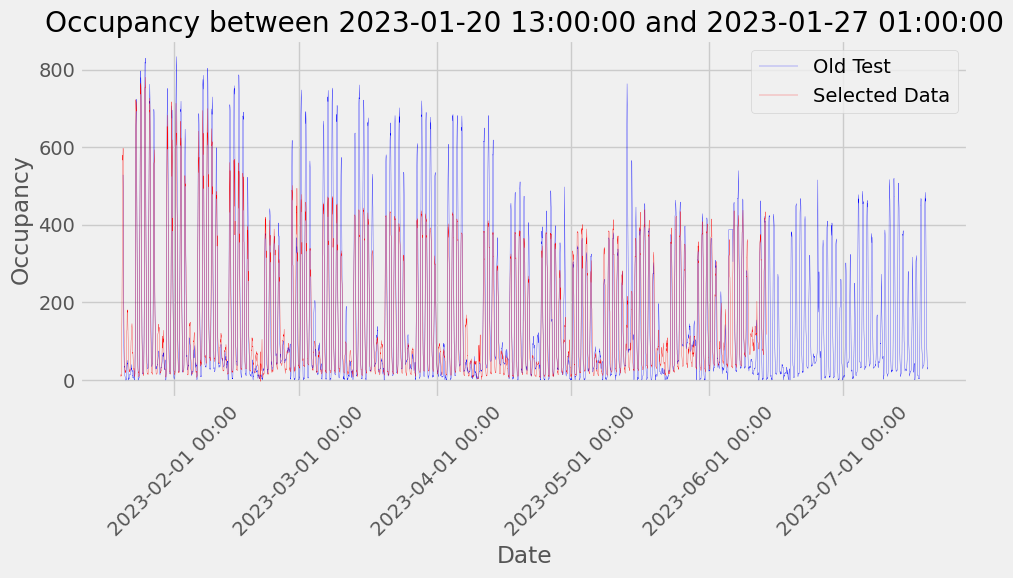

In [286]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

num_count = 2

# Select data between start_ind_time and start_ind_time_a
selected_data = something_df.loc[(something_df.index >= date_time) & (something_df.index <= date_time + pd.DateOffset(months = 6))]
old_test_formatted = old_test.loc[(old_test.index >= date_time) & (old_test.index <= date_time + pd.DateOffset(months = 6))]

# Plot the 'Occupancy' column
plt.figure(figsize=(10, 6))  # Adjust size as needed
plt.plot(old_test_formatted.index, old_test_formatted['Occupancy'], linestyle='-', linewidth=0.2, color='blue', label='Old Test')
plt.plot(selected_data.index, selected_data['Occupancy'], linestyle='-', linewidth=0.2, color='red', label='Selected Data')

# Format the x-axis with date format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

plt.title('Occupancy between {} and {}'.format(start_ind_time, date_time + pd.DateOffset(weeks = 1)))
plt.xlabel('Date')
plt.ylabel('Occupancy')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ensure the DataFrames are aligned by index
aligned_data = old_test_formatted.align(selected_data, join='inner', axis=0)

# Extract the 'Occupancy' columns from both DataFrames
y_true = aligned_data[0]['Occupancy']
y_pred = aligned_data[1]['Occupancy']

# Calculate metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


ValueError: Input contains NaN.

In [ ]:
# Get feature importances
feature_importances = reg.feature_importances_

# Get feature names
feature_names = reg.feature_name_

# Print feature importances and names
for name, importance in zip(feature_names, feature_importances):
    print(name, ":", importance)


temp : 162
visibility : 16
dew_point : 132
feels_like : 76
pressure : 124
humidity : 103
wind_speed : 34
clouds_all : 71
rain_1h : 31
snow_1h : 20
weather_Clear_sky_is_clear : 5
weather_Clouds_broken_clouds : 1
weather_Clouds_few_clouds : 6
weather_Clouds_overcast_clouds : 4
weather_Clouds_scattered_clouds : 3
weather_Drizzle_drizzle : 0
weather_Drizzle_light_intensity_drizzle : 0
weather_Drizzle_light_intensity_drizzle_rain : 0
weather_Drizzle_rain_and_drizzle : 0
weather_Dust_dust : 0
weather_Fog_fog : 0
weather_Haze_haze : 6
weather_Mist_mist : 0
weather_Rain_heavy_intensity_rain : 0
weather_Rain_heavy_intensity_shower_rain : 0
weather_Rain_light_intensity_shower_rain : 0
weather_Rain_light_rain : 1
weather_Rain_moderate_rain : 0
weather_Rain_proximity_shower_rain : 0
weather_Rain_shower_rain : 0
weather_Rain_very_heavy_rain : 0
weather_Smoke_smoke : 0
weather_Snow_heavy_snow : 0
weather_Snow_light_rain_and_snow : 0
weather_Snow_light_shower_sleet : 0
weather_Snow_light_shower_snow 

In [ ]:
feature_importances = reg.feature_importances_

# Create a DataFrame to store the feature importances
feature_importance = pd.DataFrame(data=feature_importances, index=X_train.columns, columns=['importance'])

# Print the DataFrame
print(feature_importance)

            importance
temp               162
visibility          16
dew_point          132
feels_like          76
pressure           124
...                ...
lag_2_days         125
lag_3_days         141
lag_4_days         149
lag_5_days         149
lag_6_days         183

[80 rows x 1 columns]


In [ ]:
X_train.columns

Index(['temp', 'visibility', 'dew_point', 'feels_like', 'pressure', 'humidity',
       'wind_speed', 'clouds_all', 'rain_1h', 'snow_1h',
       'weather_Clear_sky is clear', 'weather_Clouds_broken clouds',
       'weather_Clouds_few clouds', 'weather_Clouds_overcast clouds',
       'weather_Clouds_scattered clouds', 'weather_Drizzle_drizzle',
       'weather_Drizzle_light intensity drizzle',
       'weather_Drizzle_light intensity drizzle rain',
       'weather_Drizzle_rain and drizzle', 'weather_Dust_dust',
       'weather_Fog_fog', 'weather_Haze_haze', 'weather_Mist_mist',
       'weather_Rain_heavy intensity rain',
       'weather_Rain_heavy intensity shower rain',
       'weather_Rain_light intensity shower rain', 'weather_Rain_light rain',
       'weather_Rain_moderate rain', 'weather_Rain_proximity shower rain',
       'weather_Rain_shower rain', 'weather_Rain_very heavy rain',
       'weather_Smoke_smoke', 'weather_Snow_heavy snow',
       'weather_Snow_light rain and snow', 'we

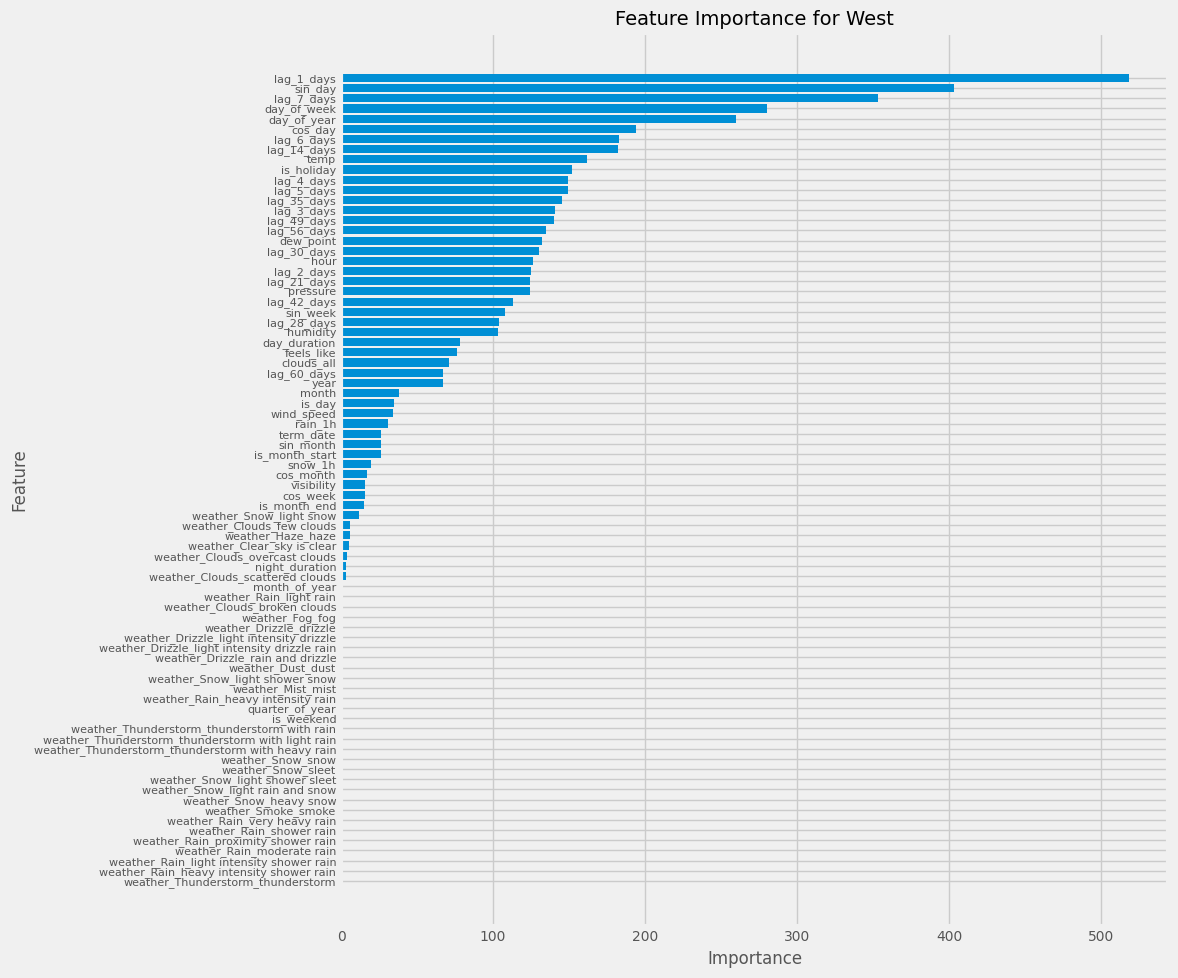

In [ ]:
import matplotlib.pyplot as plt

# Sort the feature importances in ascending order
sorted_feature_importance = feature_importance.sort_values('importance')

# Plot the sorted feature importances
plt.figure(figsize=(12, 10))
barplot = plt.barh(sorted_feature_importance.index, sorted_feature_importance['importance'])

# Adjust font size for each y-axis label individually
for tick in plt.gca().get_yticklabels():
    tick.set_fontsize(8)

plt.xlabel('Importance', fontsize=12)  # Adjust font size for x-label
plt.ylabel('Feature', fontsize=12)  # Adjust font size for y-label
plt.title(f'Feature Importance for {parking_lot_to_predict}', fontsize=14)  # Adjust font size for title
# Adjust font size for x-axis ticks
plt.xticks(fontsize=10)

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()
